   duration  reverseDelta  hostIP_int  ipProto  IoTPort  hostPort  \
0     0.000         0.000  4026531834       17    33033      1900   
1     0.000         0.000  3232235777       17    33789        53   
2     0.000         0.000  4026531834       17    46713      1900   
3     0.434         0.012  1249732137        6    53460       443   
4     0.000         0.000  4026531834       17    48008      1900   

   PacketCount  BytesCount  reversePacketCount  reverseBytesCount  ...  \
0            1         294                   0                  0  ...   
1            1          75                   0                  0  ...   
2            1         294                   0                  0  ...   
3           18        1986                  18              18612  ...   
4            1         294                   0                  0  ...   

   hostIP_74.125.204.188  hostIP_74.125.23.102  hostIP_74.125.23.188  \
0                      0                     0                     0

<Axes: >

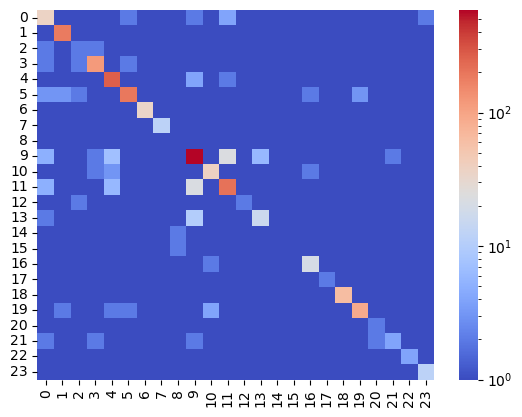

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 29 11:59:39 2024

@author: camer
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

seed = 42
column_names = [
    "name", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", 
    "IoTIP", "IoTIP_int", "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", 
    "PacketCount", "BytesCount", "reversePacketCount", "reverseBytesCount", "SmallPktCount", 
    "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT", "FirstNonEmptyPktSize", 
    "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount", 
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT", 
    "PktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT", 
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", 
    "NTP", "TCP_others", "UDP_others", "year_month"
]

# Load data and clean 'name' column
df = pd.read_csv('sample.csv', names=column_names)
df['name'] = df['name'].str.replace(r'_\d{4}_\d{2}\.csv$', '', regex=True)

# Step 3: Encode 'name' as dummy variables
target_columns = ['IoTMac']
y = df.filter(items = target_columns)
df = df.drop(['name','start_date', 'start_time', 'year_month','IoTIP', 'IoTIP_int', 'hostMac', 'IoTMac'], axis=1)
df2 = pd.get_dummies(df, drop_first=True)

X = df2
print(X.head())
print(y.head())
# Split the dataset into training and test sets 20-80
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=seed)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=25, random_state=seed)
'''
selector = sfs(model, direction='forward', cv=2)
selector.fit(X_train,y_train)
features = selector.get_feature_names_out(list(X))
'''

model.fit(X_train, y_train)

# Make predictions and evaluate the model

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.5f}')
cmatrix = confusion_matrix(y_test, y_pred)
for f in cmatrix:
    f += 1



import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmatrix, annot=False, cmap='coolwarm', norm=LogNorm())